<a href="https://colab.research.google.com/github/samikhafeez/Project-2/blob/main/Facial_expression_detection_Part_2_(Project2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import pandas as pd
import os
from PIL import Image

# Path to the CSV file
csv_path = '/content/drive/MyDrive/fer2013.csv'

df = pd.read_csv(csv_path)

# Setting the main folder path
main_folder_path = '/content/drive/MyDrive/Facial_emotion_3'

# Creating a new folder inside the local directory
os.makedirs(main_folder_path, exist_ok=True)

# Saving images for each emotion in separate folders
for i, label in enumerate(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']):
    emotion_df = df[df['emotion'] == i]

    # Creating individual folders for each emotion inside the new folder
    emotion_folder_path = os.path.join(main_folder_path, label)
    os.makedirs(emotion_folder_path, exist_ok=True)

    # Saving images for each emotion
    for j, image_pixels in enumerate(emotion_df.iloc[1:, 1]):
        image_string = image_pixels.split(' ')
        image_data = np.asarray(image_string, dtype=np.uint8).reshape(48, 48)
        img = Image.fromarray(image_data)

        # Saving each image to the respective emotion folder
        img_path = os.path.join(emotion_folder_path, f"{label}_img_{j}.png")
        img.save(img_path, "PNG")

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the FER-2013 dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Emotion_dataset/Training',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Emotion_dataset/Validation',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Emotion_dataset/Testing',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

Found 5253 images belonging to 7 classes.
Found 655 images belonging to 7 classes.
Found 660 images belonging to 7 classes.


In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense, Dropout,Flatten
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

#Preprocess all test images
train_generator= train_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Emotion_dataset/Training',
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',)


#Preprocess all train images
validation_generator= validation_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Emotion_dataset/Testing',
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
    )
test_generator= test_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Emotion_dataset/Testing',
    target_size=(48,48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'

)

# Convolution Neural Network for Emotion Detection.
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024,activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7,activation='softmax'))

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])




Found 5253 images belonging to 7 classes.
Found 660 images belonging to 7 classes.
Found 660 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
#Train the neural network/model
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=5253//64,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=655//64,
)

In [ ]:
model_json = emotion_model.to_json()
with open("/content/drive/MyDrive/Emotion_dataset/model/emotion_model.json","w") as json_file:
  json_file.write(model_json)
emotion_model.save_weights('/content/drive/MyDrive/Emotion_dataset/model/emotions_model.weights.h5')


In [ ]:
import cv2
import numpy as np
import json
from keras.models import model_from_json
emotion_dict = {0:'Angry',1:'Disgust',2:'Fear', 3:'Happy', 4:'Neutral',5:'Sad',6:'Surprised'}
# loading json and create model
with open("/content/drive/MyDrive/Emotion_dataset/model/emotion_model.json", "r") as json_file:
    loaded_model_json = json.load(json_file)

json_file.close()
emotion_model = model_from_json(json.dumps(loaded_model_json))  # Pass the loaded dictionary as a string to model_from_json

json_file.close()
# load weights into new model
emotion_model.load_weights("/content/drive/MyDrive/Emotion_dataset/model/emotions_model.weights.h5")
print("Loaded the model")

Loaded the model


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


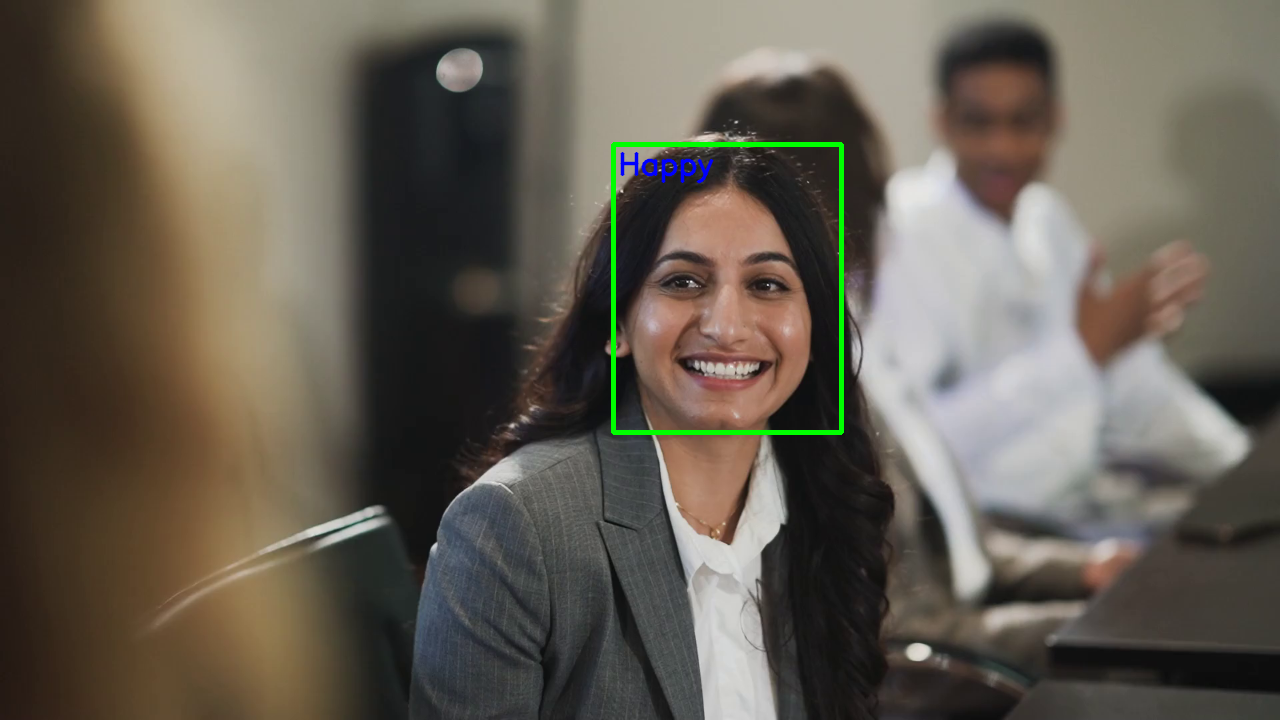

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


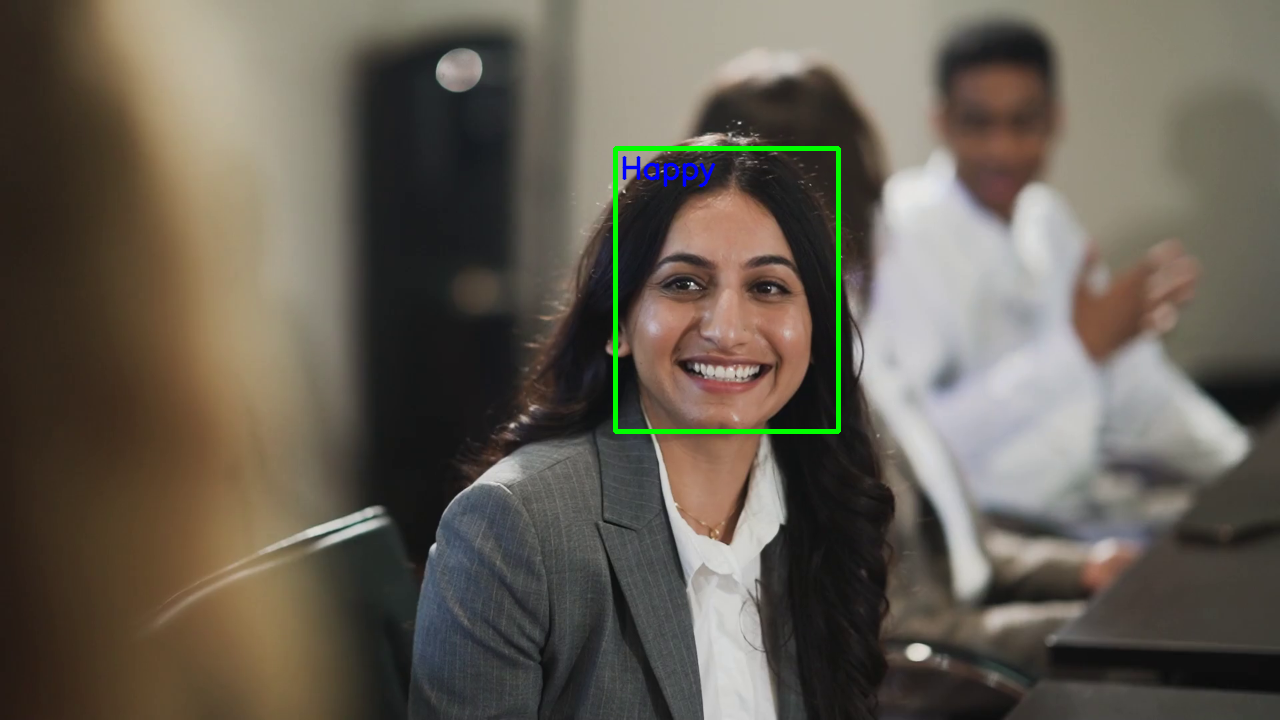

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


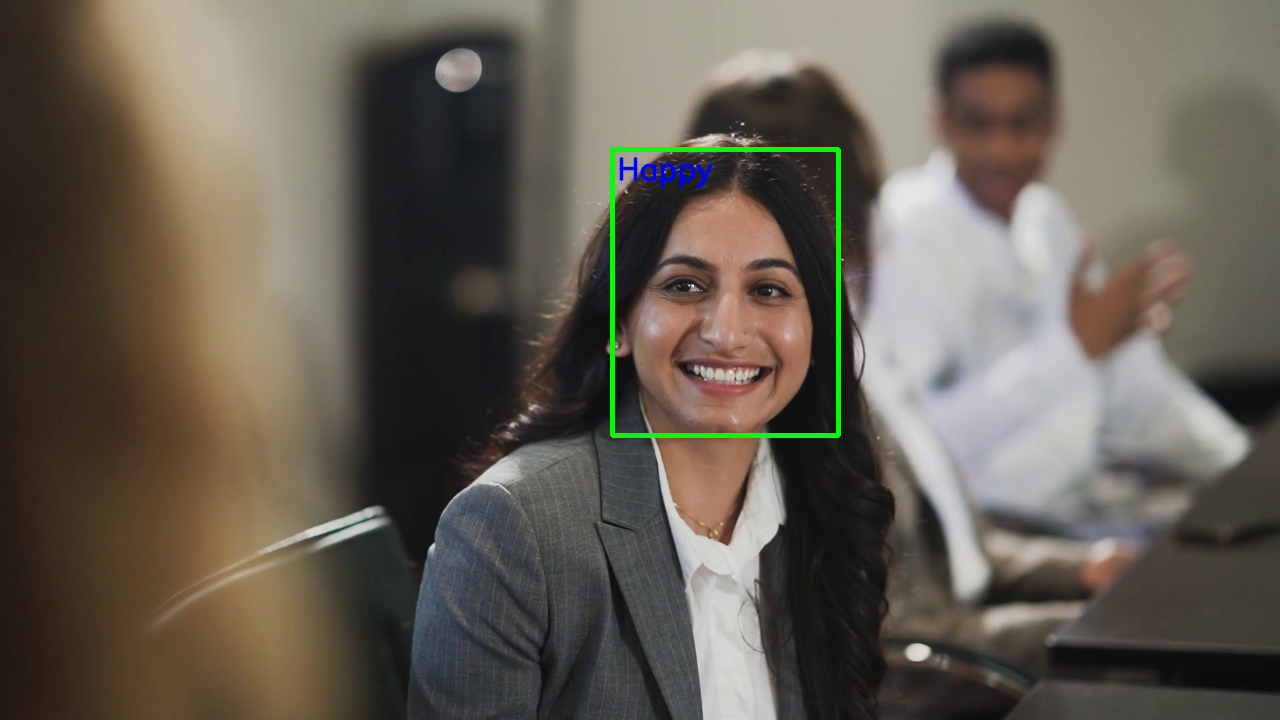

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


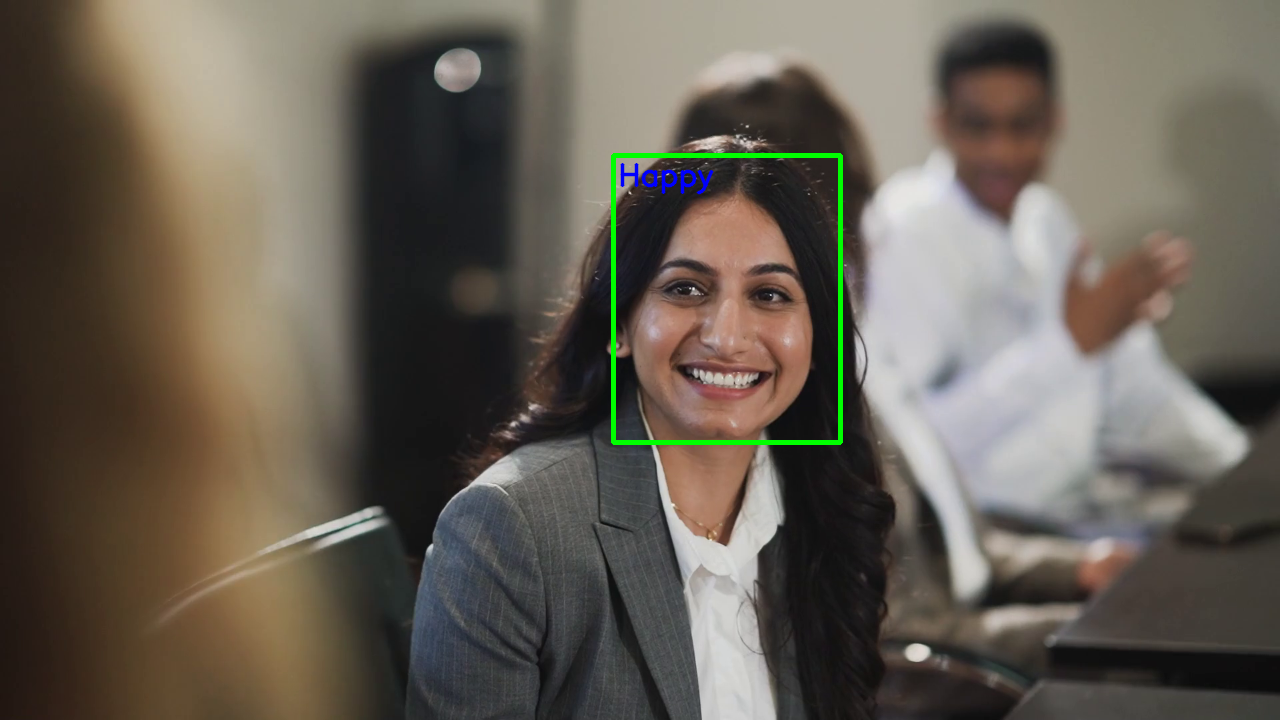

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


KeyboardInterrupt: 

In [ ]:
# Start the webcam feed
#cap = cv2.VideoCapture(0)
from google.colab.patches import cv2_imshow
#test different videos here.
cap = cv2.VideoCapture('/content/drive/MyDrive/pexels-rodnae-productions-7647691 (1080p).mp4')
#
while True:
  ret, frame = cap.read()
  frame = cv2.resize(frame,(1280,720))
  if not ret:
    break
  face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Emotion_dataset/haarcascade/haarcascade_frontalface_default.xml')
  gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  num_faces = face_detector.detectMultiScale(gray_frame,scaleFactor=1.3,minNeighbors=5)

  for (x, y, w, h) in num_faces:
    cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
    roi_gray = gray_frame[y:y+h, x:x+w]
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    emotion_prediction = emotion_model.predict(cropped_img)

    maxindex = int(np.argmax(emotion_prediction))
    cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
  cv2_imshow(frame)
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows

In [ ]:
from sklearn.metrics import classification_report


# Evaluating the model on the test set
test_steps = test_generator.n // test_generator.batch_size
evaluation = emotion_model.evaluate(test_generator, steps=test_steps)

# Get predictions on the test set
predictions = emotion_model.predict(test_generator, steps=test_steps)
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels
true_labels = []

# Iterating over the batches in the test generator to collect true labels
for i in range(test_steps):
    batch_images, batch_labels = test_generator[i]
    true_labels.extend(np.argmax(batch_labels, axis=1))

# Converting class indices to class labels
class_labels = list(test_generator.class_indices.keys())

# Generating a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_labels)

# Printing the evaluation metrics
print("Evaluation Metrics:")
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])
print("\nClassification Report:\n", class_report)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 459ms/step - accuracy: 0.1699 - loss: 1.9448
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step
Evaluation Metrics:
Loss: 1.9472761154174805
Accuracy: 0.15312500298023224

Classification Report:
               precision    recall  f1-score   support

       Angry       0.14      0.98      0.25        94
     Disgust       0.00      0.00      0.00        53
        Fear       0.00      0.00      0.00        98
       Happy       0.00      0.00      0.00       100
     Neutral       0.00      0.00      0.00        99
         Sad       0.00      0.00      0.00        98
    Surprise       0.00      0.00      0.00        98

    accuracy                           0.14       640
   macro avg       0.02      0.14      0.04       640
weighted avg       0.02      0.14      0.04       640



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: nan
Classification Report:
               precision    recall  f1-score   support


    accuracy                           0.00       0.0
   macro avg        nan       nan       nan       0.0
weighted avg       0.00      0.00      0.00       0.0

Confusion Matrix:
 []


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 0, does not match size of target_names, 7
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to co